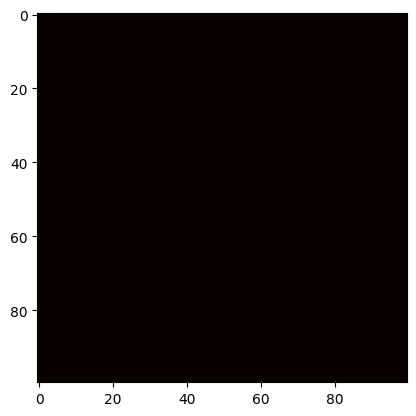

In [ ]:
import numpy as np
import random

class SLCA:
    def __init__(self, size, learning_rate=0.1, decay_rate=0.01):
        self.size = size
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.grid = np.zeros((size, size))

    def activate(self):
        for i in range(self.size):
            for j in range(self.size):
                # Compute local rule (simple example)
                rule_value = (self.grid[(i-1) % self.size, j] + 
                              self.grid[i, (j-1) % self.size] +
                              self.grid[i, (j+1) % self.size]) / 3
                if random.random() < 0.5:  # Randomly decide to update rule
                    new_rule_value = np.clip(rule_value * (self.learning_rate + 
                                                        random.random()), -1, 1)
                    self.grid[(i-1) % self.size, j] = new_rule_value

    def evolve(self):
        for i in range(self.size):
            for j in range(self.size):
                # Compute state update rule
                state_value = np.max([self.grid[k, j] * (1 - 
                                                      self.decay_rate + 
                                                      random.random())  # Random perturbation
                                  for k in range(4)])
                if random.random() < 0.5:  # Randomly decide to stay or move
                    new_state_value = np.clip(state_value * (self.learning_rate + 
                                                            random.random()), -1, 1)
                    self.grid[i, j] = new_state_value

# Example usage:
slca = SLCA(100)

for _ in range(1000):
    slca.evolve()
    slca.activate()

import matplotlib.pyplot as plt
plt.imshow(slca.grid, cmap='hot', interpolation='nearest')
plt.show()